#Linear Regreession

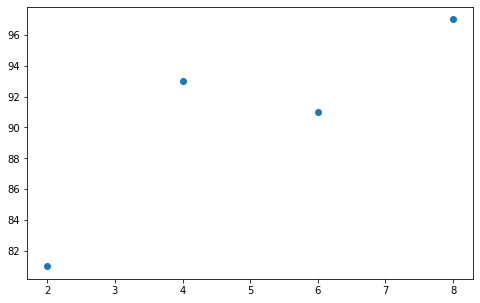

In [2]:
import numpy as np                   #전처리용
import pandas as pd                  #데이터분석용
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 81],[4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 나타내 봅니다.
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [3]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줍니다.(인덱스를 주어 하나씩 불러와 계산이 가능해지도록함.)
x_data = np.array(x)
y_data = np.array(y)

#기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

#학습률을 정합니다.
lr = 0.03

#몇 번 반복될지 설정합니다.
epochs = 2001

#경사 하강법을 시작합니다.
for i in range(epochs): #epoch 수 만큼 반복
  y_hat = a * x_data + b #y를 구하는 식을 세웁니다.
  error = y_data - y_hat #오차를 구하는 식을 세웁니다.

  #편미분 공식을 사용해서 미분
  a_diff = -(2/len(x_data))* sum(x_data *(error)) #오차함수를 a로 미분한 값입니다. 
  b_diff = -(2/len(x_data))* sum(error) #오차함수를 b로 미분한 값입니다.
  
  #반대방향으로 가기 위해서 -  / 학습률과 편미분한 값을 곱해 a, b에서 뺀 다음 업데이트
  a = a - lr * a_diff #학습률을 곱해 기존의 a값을 업데이트 합니다.
  b = b - lr * b_diff #학습률을 곱해 기존의 b값을 업데이트 합니다.
  
  if i % 100 ==0:     #100번 반복될 때마다 현재의 a값, b값을 출력합니다.
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" %(i, a, b))

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


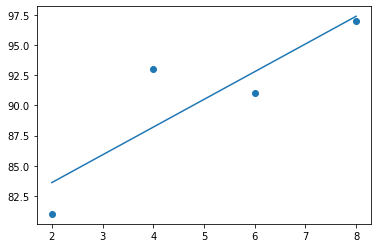

In [4]:
#앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

다중 선형 회귀

두개의 독립변수 X1과 X2를 사용해 변수 y를 만들경우  기울기를 두개 구해야 함

y = a1x1 + a2x2 + b



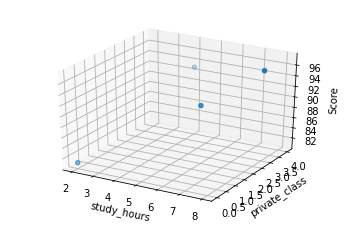

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#공부시간 X와 성적 Y의 리스트를 만듭니다
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2]for i in data]

#그래프로 확인해 봅니다.
ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1, x2, y)
plt.show()

로지스틱 회귀

참 거짓을 판단 장치를 만들어 주어진 입력값의 특징을 추출함. 이를 저장해서 모델을 만듦

누군가가 비슷한 질문을 하면 만들어놓은 모델을 꺼내 답을함 > 이것이 딥러닝의 동작 원리

- 선형회귀와 마찬가지로 적절한 선을 그려가는 과정

- 다만 직선이 아니라 참(1) 과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어주는 작업

- 여기에 들어가는 함수가 시그모이드 함수 (S자 형태로 그래프가 그려지는 함수)

- 공식은 y = 1/1+e^-(ax+b)  /e는 자연상수 2.718

- a는 그래프의 경사도를 결정함. b값은 그래프의 좌우 이동을 의미함.(클때는 오른쪽으로, 작을때는 왼쪽으로)

- a값이 작을때는(0에 가까워질때) 그래프가 평행한 모양으로 나옴, 클때는 S자
- a와 오차의 관계:  a가 작아질수록 오차는 무한대로 커지지만, a가 커진다고 해서 오차가 없어지지 않는다.

- b와 오차의 관계: b값이 너무 작아지거나 커지면 오차도 이에 따라 커진다.

오차공식

- 경사 하강법은 먼저 오차를 구한 다음 오차가 작은 쪽으로 이동시키는 방법

- 예측 값과 실제 값의 차이, 즉 오차를 구하는 공식이 필요함.

- 시그모이드 함수의 특징
   - y값이 0과 1사이
   - 실제 값이 1일때 예측 값이 0에 가까워지면 오차가 커짐
   - 반대로 실제 값이 0일때 예측 값이 1에 가까워지는 경우에도 오차는 커짐
   - 이를 공식으로 만들 수 있게 해 주는 함수가 바로 로그 함수임

- 실제값이 1 일때, 0일때 그래프의 식은 각 각 -logh와 -log(1-h) 임
- 실제값이 1 일때는 -logh 그래프를 쓰고 , -일때는 -log(1-h) 그래프를 써야 함.

- 로지스틱 회귀를 위해서 시그모이드 함수를 사용한다. 

- 0부터 1 사이의 값을 가지는 특성 때문에 로그 함수를 함께 써야 한다 









튜플은 순서가 있음 값을 변경 불가.
튜플은 이런게 가능함. 
# 패킹

p=1,2,'abc'

print p



# 언패킹

x,y,z=p

print x,y,z

----------------------------------------

집합은 순서가 없어 중복이 불가능

b=set('abc')
print(b)
{'b', 'a', 'c'} 

이런 놀라운 결과가 나옴

In [4]:
b=set('abc')
print(b)


{'b', 'a', 'c'}


In [5]:
#모든 친구를 찾아서 친밀도를 계산하는 알고리즘

#친구 리스트에서 자신의 모든 친구를 찾고 친구들의 친밀도를 계산하는 알고리즘
#입력: 친구 관계 그래프g, 모든 친구를 찾을 자신 start
#출력: 모든 친구의 이름과 자신의 친밀도

def print_all_friends(g, start):
  qu =[] #기억장소 1: 앞으로 처리해야할 (사람이름, 친밀도) 튜플을 큐에 저장
  done = set() #기억정소2: 이미 큐에 추가한 사람들 집합에 기록(중복 방지)

  qu.append((start, 0)) #(사람이름, 친밀도) 정보를 하나의 튜플로 묶어 처리(자기 자신 친밀도:0)
  #인자로 튜플을 전달했음.

  done.add(start) #집합에도 추가.

 #큐에 처리할 사람이 남아 있는 동안
  while qu:
    
        (p,d) = qu.pop(0) #큐에서(사람이름, 친밀도) 정보를 p와 d로 각각 꺼냄
    print(p,d)    #사람 이름과 친밀도를 출력
    for x in g[p]: #친구들 중에
      if x not in done: #아직 큐에 추가된 적이 없는 사람을
        qu.append((x, d+1)) #친밀도를 1 증가시켜 큐에 추가하고
        done.add(x)    #집합에도 추가
    
fr_info = {
    'Summer':['John','Justin','Mike'],
    'John':['Summer','Justin'],
    'Justin':['John','Summer','Mike','May'],
    'Mike':['Summer','Justin'],
    'May':['Justin','Kim'],
    'Kim':['May'],
    'Tom':['Jerry'],
    'Jerry':['Tom']
}

print_all_friends(fr_info, 'Summer')
print()
print_all_friends(fr_info, 'Jerry')

Summer 0
John 1
Justin 1
Mike 1
May 2
Kim 3

Jerry 0
Tom 1


파이썬의 튜플

- 여러개의 정보를 묶어서 하나의 정보처럼 사용하기 위한 기능

- 튜플로 묶어서 보관하고자 하는 정보가 있다면 소괄호 안에 쉼표(,)를 찍어 나열 자료가 1개면 (1,) 이런식으로 찍어야함

In [6]:
t = (3,7)
print(t)
print()
print(t[0]) #튜플 t의 첫번째 정보값
print()
print(t[1]) #튜플 t의 두번째 정보값
print()
(x,y) = t
print(x)
print(y)

(3, 7)

3

7

3
7


In [7]:
#그래프탐색: 너비 우선 탐색
#입력: 그래프 g, 탐색 시작점 start
#출력 : start 에서 출발해 연결된 꼭지점들을 출력

def bfs(g, start):
  qu = []           #기억 장소1: 앞으로 처리해야 할 꼭짓점을 큐에 저장
  done = set()      #기억 장소2: 이미 큐에 추가한 꼭짓점들을 집합에 기록(중복방지)

  qu.append(start)# 시작점을 큐에 넣고 시작
  done.add(start)#집합에도 추가

  while qu:    #큐에 처리할 꼭짓점이 남아 있으면
    p = qu.pop(0)   #큐에 처리 대상을 꺼내어
    print(p)        #꼭짓점 이름을 출력하고
    for x in g[p]:   #대상 꼭짓점에 연결된 꼭짓점들 중에
      if x not in done:  #아직 큐에 추가된 적이 없는 꼭짓점들을
        qu.append(x)  #큐에 추가하고
        done.add(x)   #집합에도 추가

#그래프 정보
g = {
     1:[2,3],
     2:[1,4,5],
     3:[1],
     4:[2],
     5:[2]
}

bfs(g,1)

1
2
3
4
5


너비우선탐색 (Breadth First Search) 

처리해야 할 꼭짓점을 큐에서 하나씩 꺼내 처리하고, 그 꼭짓점에 연결된 꼭짓점들을 다시 큐에 추가하면서 그래프에 탐색하는 방법


    그래프 탐색 과정
      
      1. 시작 꼭짓점을 qu와 done에 각각 추가하고 시작합니다. 

         qu = [1], done = {1}

      2. qu 에서 1을 꺼내 출력합니다. 

         qu = [] , done{1}

      3. 1에 연결된 2, 3 을 qu와 done에 추가합니다. 

         qu=[2,3], done = {1,2,3}

      4. qu에서 2를 꺼내 출력합니다.

         qu =[3],done ={1,2,3}

      5. 2에 연결된 1,4,5 중에서 1은 이미 done 에 있으므로 중복되지 않도록 제외하고 4,5를 qu와 done 에 추가합니다.

         qu = [3,4,5] ,done={1,2,3,4,5}

      6. qu 에서 3을 꺼내 출력합니다.
   
         qu = [3,4,5], done = {1,2,3,4,5}

      7. 3에 연결된 1은 이미 done 에 있으므로 추가 하지 않습니다.

      8. qu에서 4를 꺼내 출력합니다.

         qu = [5] , done = {1,2,3,4,5}

      9. 4에 연결된 2는 이미 done 에 있으므로 추가하지 않습니다.

      10. qu에서 5를 꺼내 출력합니다. 

          qu = [], done ={1,2,3,4,5}

      11. 5에 연결된 2는 이미 done에 있으므로 추가하지 않습니다.

      12. qu가 비었으므로 종료함니다.

      13. 이 과정으로 출력된 꼭짓점 순서는 1 → 2 → 3 → 4 → 5 입니다.

#탐욕 알고리즘 (Greedy Algorithm)

- 각 단계에서 최적의 수를 찾아 전역 최적해 구하기

- EX) 시간이 일부 겹치는 과목들 중 되도록 많은 수업을 들으려는 경우
  
  - 가장빨리 끝나는 과목을 골라 먼저 신청
  - 첫번째 과목이 끝난후 시작하여 가장 빨리 끝나는 과목 신청
  - 위와 같이 반복

- EX) 일정 무게만 담을 수 있는 배낭에 최대 가격의 물건들 넣기
  - 가방에 들어갈 수 있는 것 중 가장 지싼 물건을 고름
  - 그 다음으로 들어갈 수 있는 것 중 가장 비싼 것을 고름
  - 위와 같이 반복 

- Ex) 라디오쇼를 최대한 적은 수의 방송국을 방문하면서 미국 50개 주 모두 송출 하려면?
  - 첫번째 방법
    -가능한 모든 방송국의 부분집합을 나열 
      - 2^n개
    -그 중 50개 주 전체를 커버하면서 가장 원소 수가 작은 집합 선택
    -O(2^n)시간 소요
      - 항목 수가 증가한다면 매우 비효율적

#근사 알고리즘(Approxiamation Algorithm) 사용

- 정답과 거의 비슷한 답 유추
- 얼마나 빠른가 & 최적해에 얼마나 가까운가
- 아직 방송하지 않은 지역중 가장 많은 지역에 방송 가능한 방송국 선택
- 모든 주에 방송이 될 때 까지 선택 반복


In [9]:
#미로찾기 알고리즘(그래프 탐색)
#입력: 미로 정보 g, 출발점 start, 도착점 end
#출력: 미로를 나가기 위한 이동 경로는 문자열, 나갈 수 없는 미로면 물음표("?")

def solve_maze(g, start, end):
  qu = []    #기억 장소 1 : 앞으로 처리해야 할 이동 경로를 큐에 저장
  done = set() #기억장소 2: 이미 큐에 추가한 꼭짓점들을 집합에 기록(중복 방지)

  qu.append(start) #출발점을 큐에 넣고 시작
  done.add(start)  #집합에도 추가

  while qu:    #큐에 처리할 경로가 남아 있으면
    p = qu.pop(0) #큐에서 처리 대상을 꺼냄 0번째 대상
    v = p[-1] #큐에 저장된 이동 경로의 마지막 문자가 현재 처리해야 할 꼭짓점
    if v == end: #처리해야 할 꼭짓점이 도착점이면(목적지 도착!)
      return p #지금까지의 전체 이동 경로를 돌려주고 종료
    for x in g[v]: #대상 꼭짓점에 연결된 꼭짓점들 중에
      if x not in done: #아직 큐에 추가된 적이 없는 꼭짓점을 
        qu.append(p + x) #이동 경로에 새 꼭짓점으로 추가하여 큐에 저장하고
        done.add(x)      #집합에도 추가함

  #탐색을 마칠 때까지도 도착점이 나오지 않으면 나갈수 없는 미로임
  return "?"

#미로정보
# 미로의 각 위치에 알파벳으로 이름을 지정
# 각 위체에서 한번 이동할 수 있는 모든 위치를 선으로 연결하여 그래프로 표현

maze = {
    'a':['e'],
    'b':['c','f'],
    'c':['b','d'],
    'd':['c'],
    'e':['a','i'],
    'f':['b','g','j'],
    'g':['f','h'],
    'h':['g','l'],
    'i':['e','m'],
    'j':['f','k','n'],
    'k':['j','o'],
    'l':['h','p'],
    'm':['i','n'],
    'n':['m','j'],
    'o':['k'],
    'p':['l']
}

print(solve_maze(maze,'a', 'p'))

aeimnjfghlp


- 현실 세계의 문제를 컴퓨터로 풀려면 문제를 분석하여 효과적인 모델(모형)을 만드는 것이 가장 중요한 첫걸음

- 먼저 문제를 잘 모델링하고, 그 모델에 여러 가지 알고리즘을 적용하여 문제를 푼 다음 그 결과를 다시 실제 세계에 적용하는 것

- 이는 실생활의 문제를 컴퓨터를 사용해서 푸는 일반적인 과정.

In [11]:
#가짜 동전을 찾는 알고리즘1
#주어진 동전 n개 중에 가짜 동전(fake)을 찾아내는 알고리즘
#입력: 전체 동전 위치의 시작과 끝(0, n-1)
#출력: 가짜 동전의 위치번호

#무게 재기 함수
#a에서 b까지 놓인 동전과
#c에서 d까지 놓인 동전의 무게를 비교
#a에서 b까지에 가짜 동전이 있으면(가벼우면)-1
#c에서 d까지에 가짜 동전이 있으면(가벼우면) 1
#가짜 동전이 없으면(양쪽 무게가 같으면) 0
def weigh(a, b, c, d): 
  fake = 29 #가짜 동전의 위치(알고리즘은 weigh 함수를 이용하여 이 값을 맞춰야함)
  if a <= fake and fake <= b:
    return -1
  if c <= fake and fake <= d:
    return 1
  return 0

#weigh 함수(달다(저울질))를 이용하여
#left 와 right 까지에 있는 가짜 동전의 위치를 알아냄
def find_fakecoin(left, right):
  for i in range(left+1, right +1): #left+1부터 right 까지 반복
    #가장 왼쪽 동전과 나머지 동전을 차례로 비교
    result = weigh(left, left, i, i)
    if result == -1: #left 동전이 가벼움(left 동전이 가짜)
      return left
    elif result == 1: #i 동전이 가벼움(i동전이 가짜)
      return i
    #두 동전의 무게가 같으면 다음 동전으로
  #모든 동전의 무게가 같으면 가짜 동전이 없는 예외 경우
  return -1

n = 100 # 전체 동전 개수
print(find_fakecoin(0, n-1))

29
